
<h3>Random Forest and Decision Trees</h3>


For this project we will be exploring public data from Lending Club. 
This platform connects people who need money (borrowers) with people who have money (investors).

<p>Objectives</p>
* Determine the probability that a borrowers has of paying the loan back. <br>
* Create a model that predicts this
<hr>

The columns from csv file  represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 1 if the borrower paid in full, 0 if not

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Load Data</h4>

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
#exploring the dataset

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


This dataset contains 9578 entries which is a good amount <p>
We can see that purpose is a categorical columns, while the rest seem to be numerical

In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#checking the head of the data
loans.head(4)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0


<h3>Exploratory Data Analysis</h3>
Visualizing the Data

Let's explore the FICO columns which represents the credit score of the borrowers <br>
Credit.policy categorizes the borrowers, 1 if the customer meets the credit  criteria and 0 otherwise.<br>
Let's visualize this

Text(0.5, 0, 'FICO')

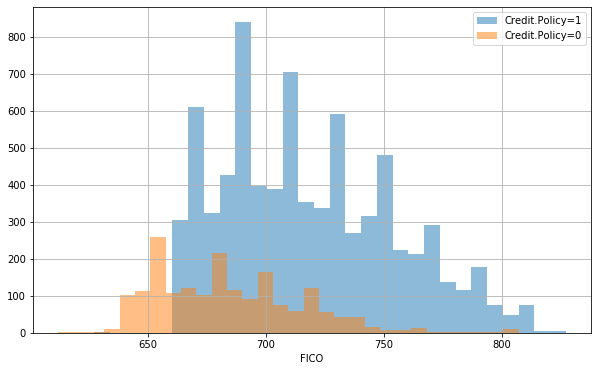

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=30, label='Credit.Policy=1', alpha=0.5)
loans[loans['credit.policy']==0]['fico'].hist(bins=30, label='Credit.Policy=0', alpha=0.5)
plt.legend()
plt.xlabel('FICO')

Let's compare FICO and if the borrower paid in full or not

Text(0.5, 0, 'FICO')

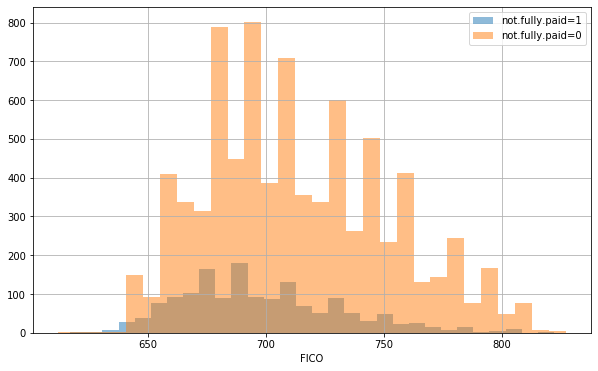

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, label='not.fully.paid=1', alpha=0.5)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, label='not.fully.paid=0', alpha=0.5)
plt.legend()
plt.xlabel('FICO')

Let visualize the amount of borrowers who paid or not their loans

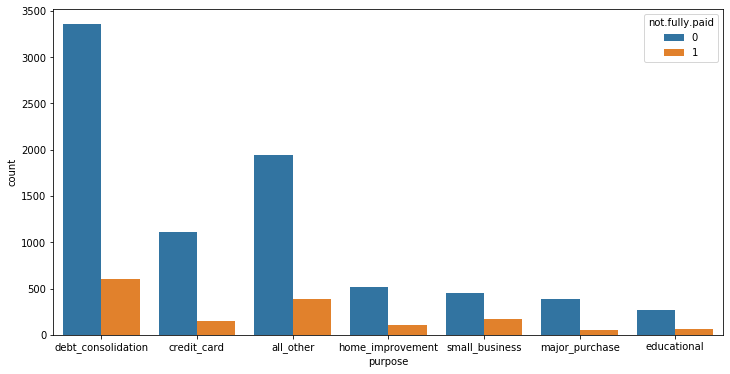

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')

As we can see, debt_consolidation seems to have the least amount of full payments <br>
Also, the ratio between not fully paid and fully paid seems to be the same no matter the purpose

In [15]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


Let's see the trend between FICO score and interest rate.

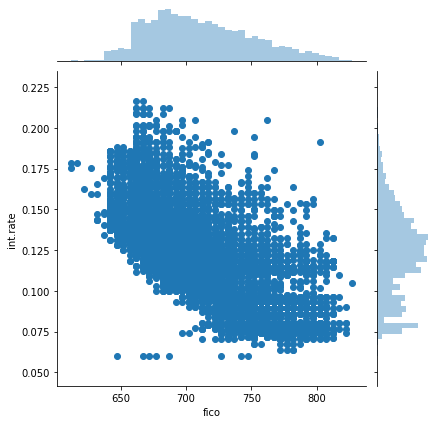

In [16]:
sns.jointplot(x='fico',y='int.rate',data=loans)

We can see that the higher the fico the less interest the borrower has to pay <p>
Let's evaluate if the trend is different between not.fully.paid and credit.policy

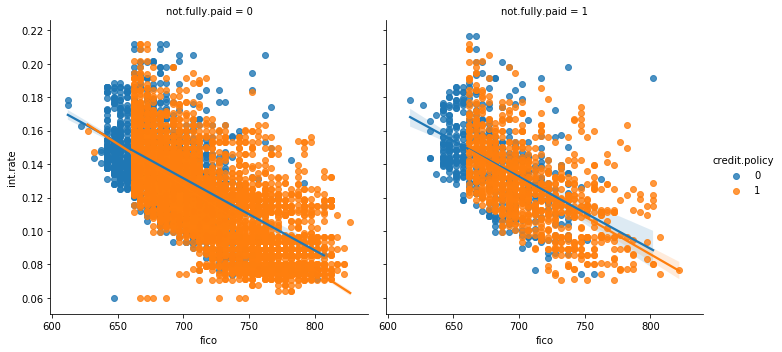

In [17]:
sns.lmplot(x='fico',y='int.rate',data=loans,col='not.fully.paid',hue='credit.policy')

<h3>Preparing the Data</h3>

Let's get ready to set up our data for our Random Forest Classification Model

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<h4>Categorical Features </h4>

Becase the purpose column is categorical, we need to transform them using dummy variables so that sklearn will be able to understand them.

In [18]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [20]:
cat_features = ['purpose']

In [24]:
#Using  pd.get_dummiesto create a  dataframe that has new feature columns with dummy variables. 
# we should drop_first true to avoid any issues

In [22]:
final_data = pd.get_dummies(loans,columns=cat_features,drop_first=True)

In [23]:
# check out the new DF
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

<h3>Split Data</h3>
<p>Split into train and test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<h3>Training a Decision Tree Model</h3>

Let's start by training a single decision tree first<br>

In [27]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
#Create an instance of DecisionTreeClassifier()  and fit it to the training data
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h3>Predictions and Evaluation of Decision Tree</h3>

In [30]:
#Create predictions from the test
predictions = dtree.predict(X_test)

In [31]:
#import classification report and a confusion matrix to visualize predictions
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.21      0.19       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [33]:
print(confusion_matrix(y_test,predictions))

[[2003  428]
 [ 349   94]]


As we can see, these results aren't great. <br>
We have around 0.75% of accuracy, which could be better

<h3>Training the Random Forest model</h3>
Now let's try the same using random forest, maybe we'll get better results

In [35]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=600)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h3> Predictions and Evaluation of Random Forest</h3>

In [38]:
##Create predictions from the test
rfc_pred = rfc.predict(X_test)

In [39]:
#classification report from the results
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.47      2874
weighted avg       0.79      0.85      0.78      2874



In [40]:
#  Confusion Matrix for the predictions
print(confusion_matrix(y_test,rfc_pred))

[[2424    7]
 [ 436    7]]


<h3>Conclusions</h3>

We can see that our results had an overall improvement when using the random forest, in comparison to decision trees. 

Although the recall score for class 1 was worse when using the random forest.

We can't say for sure that one is better than the other. We really have to take a look into which metrics we are evaluating.<br>

But overall, for this case the Random Forest did better.